#<strong><h2><font size = 6> Preparación de datos para la analítica 📊 </strong>
## Módulo 3: Análisis exploratorio de la calidad de los datos 🗃️ 🐍
<p><strong>Objetivo: </strong> Identificar los problemas de calidad presentes en el conjunto de datos para luego poder corregirlos. </p>

#### <strong> Paso 1: Importamos las librerías:</strong>

1. pandas: para realizar la lectura de archivos.
2. matplotlib: para la creación de gráficos en dos dimensiones.
3. seaborn: para la creación de gráficos estadísticos.
4. numpy: para realizar cálculos matemáticos sobre matrices.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### <strong> Paso 2: Cargamos los datos</strong>
Para el presente módulo se va a trabajar con el conjunto de datos <b>Automobile</b>, en el siguiente enlace puede encontrar más información:
<ul>
  <li>descripción de los datos: <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a></li>
  <li>para utilizar con python: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
  <li>tipo de datos: csv</li>
  <li>todos los datos han sido anonimizados para no descubrir la identidad de los clientes</li>
</ul>  
<p>En el siguiente código se cargan los datos de la misma forma que en los notebooks anteriores:</p>

##### <b>2.1. Cargar el conjunto de datos desde una dirección URL:</b>
* Le indicamos que lo convierta al tipo de dato dataframe (pd.read_csv), que el conjunto de datos están separados por comas (sep=",") y sus columnas no presentan cabecera (header = None)

In [2]:
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(csv_path,sep=",", header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### <strong> Paso 3: Asignamos nombres (encabezado) a cada columna:</strong>



Podemos obserar que la tabla no presenta encabezado, si no más bien, pandas le asignó automáticamente valores numéricos.
Por ello, le agregaremos su encabezado:
* 1. Creamos una lista <b>headers</b> que tendrá todos los nombres de cada columna.
* 2. Utilizamos la función <code>df.columns = headers</code> para reemplazar las cabeceras por la lista.

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
df.shape

(205, 26)

#### <strong> Paso 4: Conociendo el tipo de dato de cada columna o atributo del conjunto de datos Adult:</strong>
* Los datos puede ser de diferentes tipos. Los tipos principales almacenados en dataframes de Pandas son object, float, int, bool y datetime64.
* Con ayuda de la función <code>dtypes</code>, conoceremos el tipo de dato de cada columna.


In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

➡️ La columna "normalized-losses" es object pero debería ser de tipo numérico, al igual que "bore", etc. Para cambiar el tipo de dato de una columna específica se utiliza la función pandas.to_numeric
* Utilizamos errors='coerce' para ignorar los datos faltantes.
* A continuación cambiaremos el tipo de dato object a numérico de las siguientes columnas: "price", "stroke", "normalized-losses", "bore", "hoursepower" y "peakpower".

In [6]:
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["stroke"] = pd.to_numeric(df["stroke"],errors='coerce')
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"],errors='coerce')
df["bore"] = pd.to_numeric(df["bore"],errors='coerce')
df["horsepower"] = pd.to_numeric(df["horsepower"],errors='coerce')
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"],errors='coerce')
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### <strong> Paso 5.  Análisis de tendencia central, posición y dispersión: </strong> 🎯
* Análisis de tendencia central utilizando el histograma. Se observa: moda, mediana, media, sesgo y kurtosis.
* Se puede identificar la simetría de los datos utilizando gráficos de histograma:

* Se puede identificar que el atributo engine-size correspondiente con el tamaño del motor, es asimétrico, y además presenta un sesgo positivo hacia la derecha:

<function matplotlib.pyplot.show(close=None, block=None)>

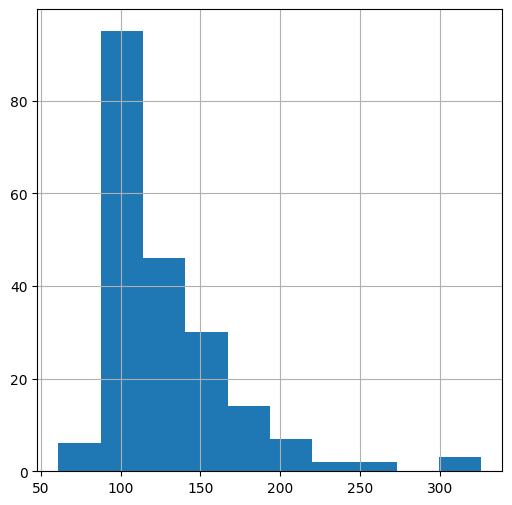

In [7]:
df['engine-size'].hist(figsize = (6,6))
plt.show

➡️ Tambien se pueden utilizar los gráficos de distplot y displot:

<ipython-input-8-e866c11429a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['engine-size'])


<Axes: xlabel='engine-size', ylabel='Density'>

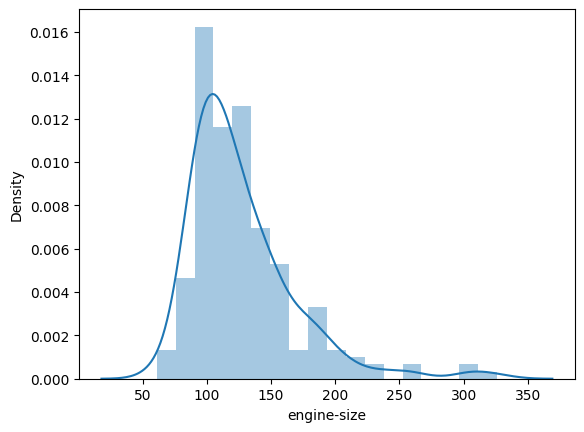

In [8]:
sns.distplot(df['engine-size'])

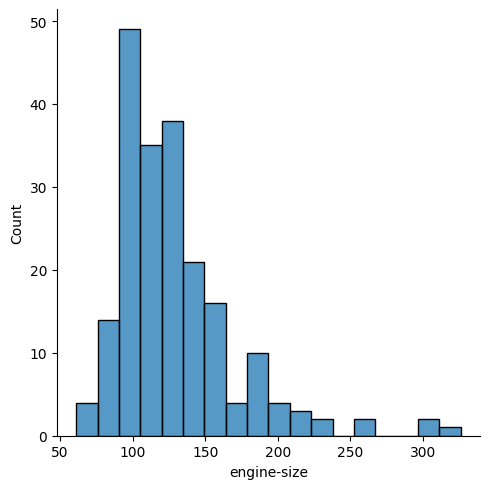

In [9]:
sns.displot(df['engine-size'])

➡️ Los valores numéricos se pueden calcular directamente para su análisis:

In [10]:
mean = df['engine-size'].mean()
median = df['engine-size'].median()
mode = df['engine-size'].mode()
skew = df['engine-size'].skew()
kurt = df['engine-size'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 126.90731707317073
La mediana es: 120.0
La moda es: 0     92
1    122
Name: engine-size, dtype: int64
El sesgo es: 1.9476550452788108
La kurtosis es: 5.305682091703767


* Se puede apreciar como la media y la mediana están cerca pero son diferentes.
* Hay 4 valores para la moda.
* El sesgo es mayor que 1, lo que indica el sesgo positivo y la kurtosis es positiva, lo que significa que más datos alrededo de la media, lo cual se evidencia en el gráfico.

➡️ Ahora analizaremos la tendencia central del atributo "length", que representa la longitud del auto.  

La media es: 174.04926829268288
La mediana es: 173.2
La moda es: 0    157.3
Name: length, dtype: float64
El sesgo es: 0.1559537713215604
La kurtosis es: -0.08289485344758996


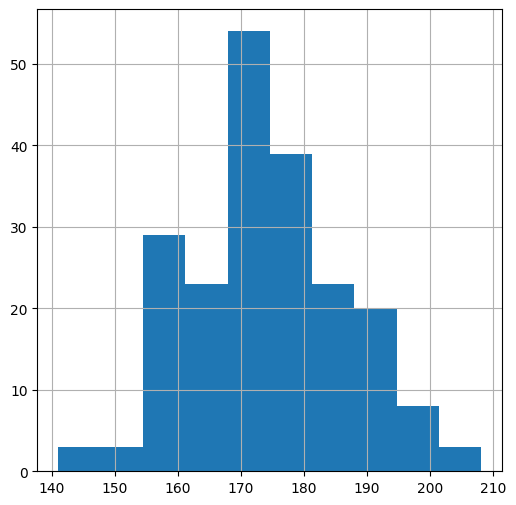

In [11]:
df['length'].hist(figsize = (6,6))
plt.show

mean = df['length'].mean()
median = df['length'].median()
mode = df['length'].mode()
skew = df['length'].skew()
kurt = df['length'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

* El atributo es simétrico, su media y mediana casi coinciden, la moda se aleja un poco de la media y la mediana. El sesgo es menor que 0.5, lo cual indica que es aproximadamente simétrico. La kurtosis es negativa, lo cual indica que el pico no es grande, y no se acumulan tantos valores alrededor de la media, sino que están más distribuidos.

➡️ Para visualizar las medidas de posición y analizar la dispersión de los datos se utilizan los gráficos de tipo boxplot. Aqui es importante identificar los valores de máximo, mínimo, mediana y cuartiles: 📦

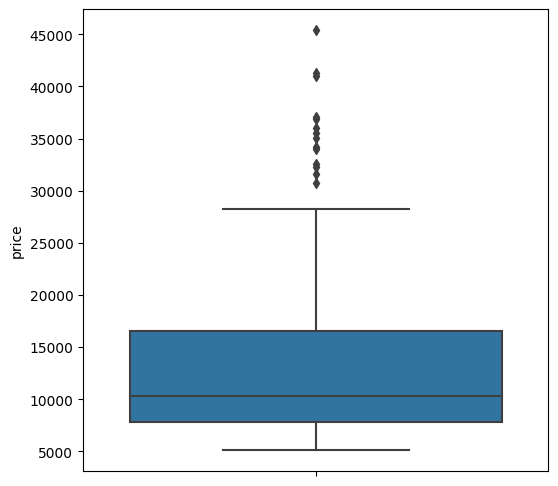

In [13]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y=df["price"])
plt.show()

In [14]:
min = df['price'].min()
max = df['price'].max()
median = df['price'].median()
quantile = df['price'].quantile([0.25,0.5,0.75])
print("El mínimo es:", min)
print("El máximo es:", max)
print("La mediana es:", median)
print("Los cuartiles son:", quantile)

El mínimo es: 5118.0
El máximo es: 45400.0
La mediana es: 10295.0
Los cuartiles son: 0.25     7775.0
0.50    10295.0
0.75    16500.0
Name: price, dtype: float64


➡️ Representar más de una variable en el gráfico de boxplot permite comparar la dispersión de los datos al poder ver los resultados de forma conjunta. Veamos la relación entre engine-location y price.

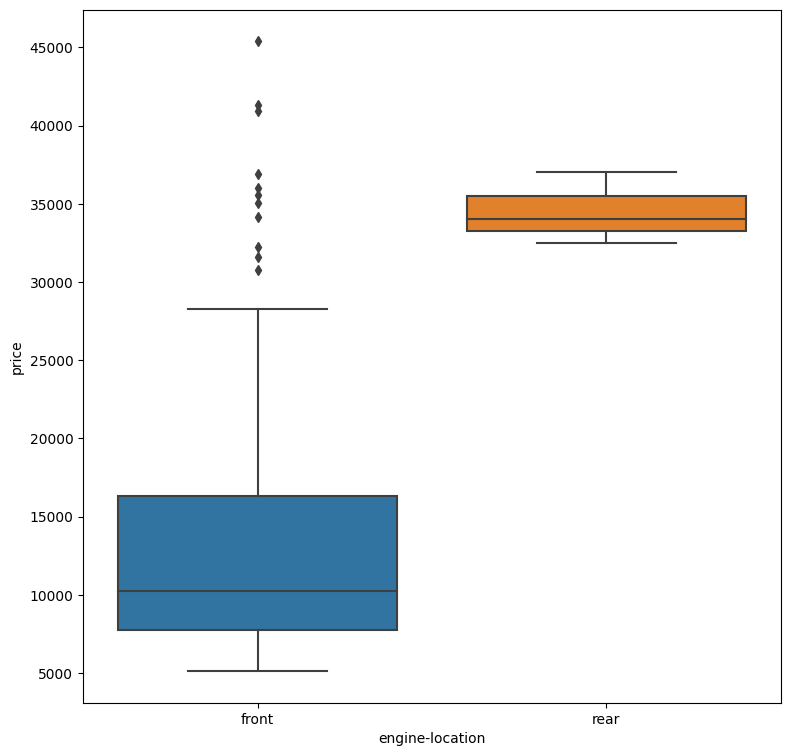

In [15]:
fig = plt.figure(figsize=(9,9))
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

Podemos ver que la distribución del precio entre estas dos categorías de ubicación del motor (delantera y trasera) es lo suficientemente distinta como para tomar la ubicación del motor como un buen predictor potencial del precio.

➡️ Ahora analizaremos los gráficos de boxplot utilizando los atributos body-style y price.

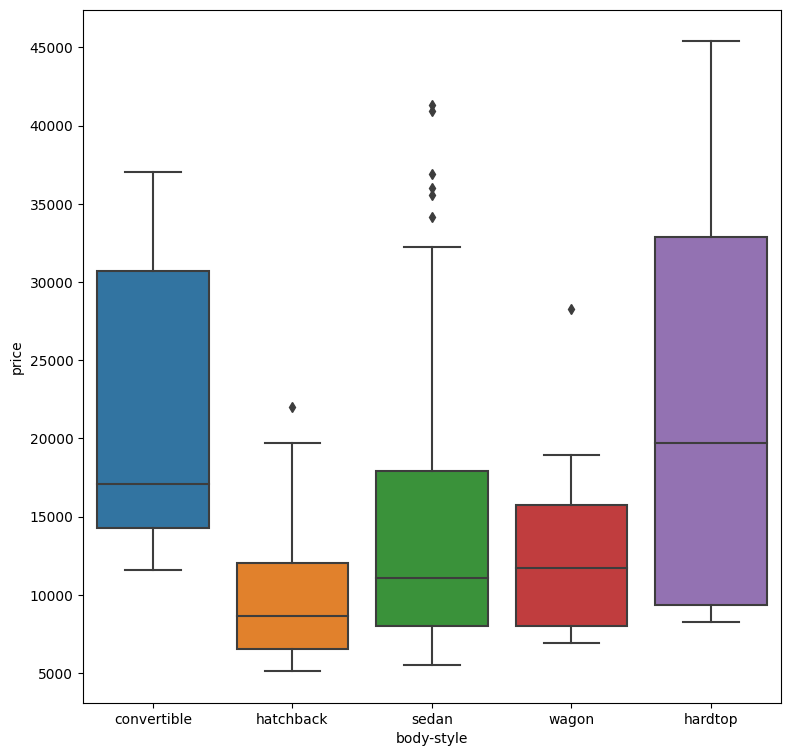

In [16]:
fig = plt.figure(figsize=(9, 9))
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

* Las distribuciones de precios entre las diferentes categorias, se solapan, por lo que los precios son similares en las diferentes categorías, y no sería una buena variable para predecir el precio.  

#### <strong> Paso 6. Identificar datos faltantes </strong> 🕵🏼🔍
* Para identificar los datos faltantes en el conjunto de datos, lo primero es visualizar los datos e identificar el valor(es) que se está utilizando para los datos faltantes. Los valores faltantes pueden ser: espacios vacíos, NA, n/a, --, ?, 0, o cualquier otro valor que no es considerado correcto en esa columna.

* Identificamos es el valor que se está utilizando para los datos faltantes en el set de datos:

In [18]:
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


Con la función <code>dataframe.isnull</code> podemos saber cuántos datos faltantes identifica Python en el conjunto de datos:

In [19]:
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


➡️ Python identifica la mayoría de los datos faltantes en el conjunto de datos. Pero en el caso de que todavía no lo hiciera correctamente se puede utilizar la librería Numpy, que permite marcar los datos faltantes como Nan:
* reemplazar "?" y "l" por NaN (valor por defecto que utiliza python para identificar datos faltantes)

In [20]:
df.replace("?", np.nan, inplace = True)
df.replace("l", np.nan, inplace = True)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


➡️ Volvemos a consultar por los datos faltantes después de reemplazar "?" y "l" por NaN, donde veremos que hay nuevas columnas con datos faltantes.

In [21]:
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type          12
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


La identificación de los datos faltantes es importante hacerlo desde el inicio de la carga de los datos, con el médoto ReadCSV:

```
missing_values = ["?", "l"]
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(csv_path,sep=",",header= None, na_values = missing_values)
df.head()
```

#### <strong> Paso 7. Identificar datos duplicados </strong> 👥

Los datos duplicados son un problema común. La duplicación puede ser total, dos filas son iguales en todos sus atributos, o parcial (tienen similitudes en algunos de sus atributos pero que hacen que el ejemplo sea el mismo)

* En el conjunto de datos de Automobile no se encuentran datos duplicados, pero a manera de ejemplo y para probar la función dataframe.drop_duplicates se insertará una fila identica a una ya existente en el conjunto de datos:

In [22]:
new_row = {'symboling':-1, 'normalized-losses':95, 'make': 'volvo', 'fuel-type': 'gas', 'aspiration':'turbo', 'num-of-doors': 'four', 'body-style':'sedan', 'drive-wheels':'rwd', 'engine-location':'front', 'wheel-base': 109.10, 'length':188.80, 'width':68.90, 'height':55.50, 'curb-weight':3062, 'engine-type':'ohc', 'num-of-cylinders':'four', 'engine-size':141, 'fuel-system':'mpfi','bore':3.78, 'stroke':3.15, 'compression-ratio':9.50, 'horsepower':114, 'peak-rpm':5400, 'city-mpg':19, 'highway-mpg':25, 'price':22625}
df = df.append(new_row, ignore_index=True)
df.shape

<ipython-input-22-6287b83430a8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


(206, 26)

➡️ El siguiente código valida si existen duplicados en el conjunto de datos, si existen, los elimina.
* Esta función identifica celdas donde todos sus atributos sean iguales, aunque es posible pasarle los atributos específicos por los que se quisiera comparar:

In [23]:
# Revisa si existen duplicados
check_dup = df.duplicated().any() # duplicated devuelve true o false
print("¿Existen valores duplicados en los datos?", check_dup)

#Eliminamos datos duplicados:
if check_dup:
  df = df.drop_duplicates()
  print("Los valores duplicados fueron eliminados.")
else:
    print("No hay valores duplicados en los datos.")

¿Existen valores duplicados en los datos? True
Los valores duplicados fueron eliminados.


➡️ Comprobamos si los datos duplicados fueron eliminados, si es así debería de haber 205 registros o muestras:

In [24]:
df.shape

(205, 26)

#### <strong> Paso 8. Agrupamiento de los datos</strong>:

Supongamos que deseamos saber si existe alguna relación entre los diferentes sistemas de manejo (drive-wheels) y los precios de los autos.
* Si existe, ¿cuál categoría añade más valor al vehículo?

* El método “groupby” agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables y el análisis se realiza en los grupos individuales.

* En el siguiente código se verifica las categorías que tiene drive-wheels:

In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

* Si queremos saber, en promedio, qué tipo de rueda es más valiosa, se puede agrupar “drive-wheels” y luego promediarlas.

* Se pueden seleccionar las columnas drive-wheels y price, luego asignarlo a la variable df_grupo1.

* Luego se puede calcular el precio promedio para cada una de las diferentes categorías de datos.

In [26]:
df_grupo1 = df[['drive-wheels','price']]
df_grupo1 = df_grupo1.groupby(['drive-wheels'], as_index=False).mean()
df_grupo1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Según los datos, los vehículos con tracción trasera son, en promedio, los más caros, mientras que los de 4 ruedas y los de ruedas delanteras tienen aproximadamente el mismo precio.

➡️ También se pueden agrupar múltiples variables. Por ejemplo, agrupar por drive-wheels y body-style. Esto agrupa el conjunto de datos por las combinaciones únicas drive-wheels y body-style.
* Se pueden almacenar los resultados en la variable df_grupo2.

In [27]:
df_grupo2 = df[['drive-wheels','body-style','price']]
df_grupo2 = df_grupo2.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grupo2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila.

* Se puede convertir el conjunto de datos en una tabla dinámica utilizando el método dataframe.pivot para crear una tabla dinámica a partir de los grupos.

* En este caso, se deja la variable drive-wheels como las filas de la tabla y se gira la variable body-style para convertirlas en las columnas de la tabla:

In [28]:
#realiza el pivote
grupo2_pivot = df_grupo2.pivot(index='drive-wheels', columns='body-style')
#rellena los valores faltantes con 0
grupo2_pivot = grupo2_pivot.fillna(0)
grupo2_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Se va a utilizar un mapa de calor para visualizar la relación entre <b>body-style</b> y <b>price</b>:

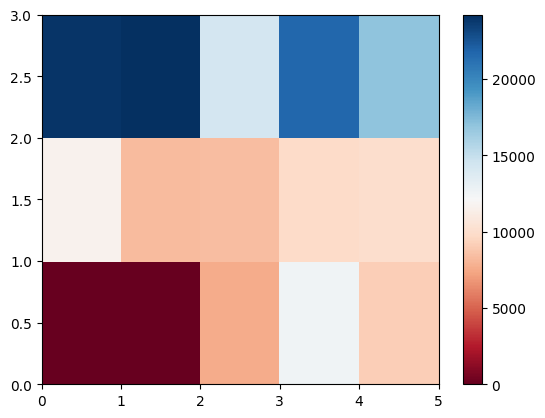

In [29]:
plt.pcolor(grupo2_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

El mapa de calor traza la variable objetivo price proporcional al color con respecto a las variables drive-wheel y body-style en los ejes vertical y horizontal, respectivamente.
* Esto permite visualizar cómo se relaciona el precio con drive-wheel y body-style.

* Las etiquetas predeterminadas no nos transmiten información útil. En el siguiente código se puede mejorar ese aspecto:

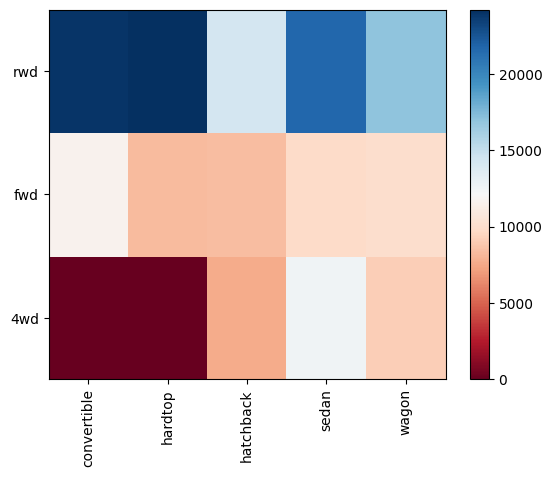

In [30]:
fig, ax = plt.subplots()
im = ax.pcolor(grupo2_pivot, cmap='RdBu')

# nombres de las etiquetas
row_labels = grupo2_pivot.columns.levels[1] #las categorías
col_labels = grupo2_pivot.index #los tipos de sistema de ruedas

# mover etiquetas al centro
ax.set_xticks(np.arange(grupo2_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grupo2_pivot.shape[0]) + 0.5, minor=False)

# insertar etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotar las etiquetas si son muy largas
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### <strong> Paso 9. Análisis de correlación y causalidad entre atributos: </strong>
La correlación de Pearson es una medida estadística que evalúa la relación lineal entre dos variables continuas. Es un número que va desde -1 hasta 1, donde:

* 1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace en proporción constante.
* -1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye en proporción constante.
* 0 indica una ausencia de relación lineal entre las variables


* La Correlación de Pearson es el método predeterminado de la función dataframe.corr.
* Se puede calcular la correlación de Pearson de las variables int64 o float64.
* El siguiente código muestra la matriz de correlación con variables solamente numéricas:


In [31]:
corrMatrix=df.corr()
corrMatrix

<ipython-input-31-a8112e7e300b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


Se puede obtener el p-value utilizando el módulo stats en la biblioteca scipy.

In [32]:
from scipy import stats
df['price'].replace(np.nan, df['price'].mean(), inplace=True) #resolver datos faltantes
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5831681499789549 with a P-value of P = 4.5276255456863486e-20


Dado que el valor p es  < 0.001, la correlación entre la distancia entre wheel-base y price es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~ 0.585).

Este análisis debe realizarse con todas las variables

➡️ Ahora calculamos el coeficiente de correlación de Pearson y el valor P de 'horsepower' y 'price'.

In [33]:
df['horsepower'].replace(np.nan, df['horsepower'].mean(), inplace=True) #resolver datos faltantes
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.7579169537498178  with a P-value of P =  1.6076703978128864e-39


* Dado que el valor p es < 0.001, la correlación entre los caballos de fuerza y el precio es estadísticamente significativa, y la relación lineal es fuerte (~ 0.809, cercana a 1).

➡️ Ahora calculamos el coeficiente de correlación de Pearson y el valor P de 'width' y 'price'.

In [34]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7286988175931842  with a P-value of P = 3.214520483803991e-35


* Dado que el valor p es < 0.001, la correlación entre la anchura y el precio es estadísticamente significativa y la relación lineal es fuerte (~ 0.751).

➡️ Se puede utilizar un mapa de calor para representar la matriz de correlación de manera visual, lo cual facilita la identifiación de las variables que están más correlacionadas:

<Axes: >

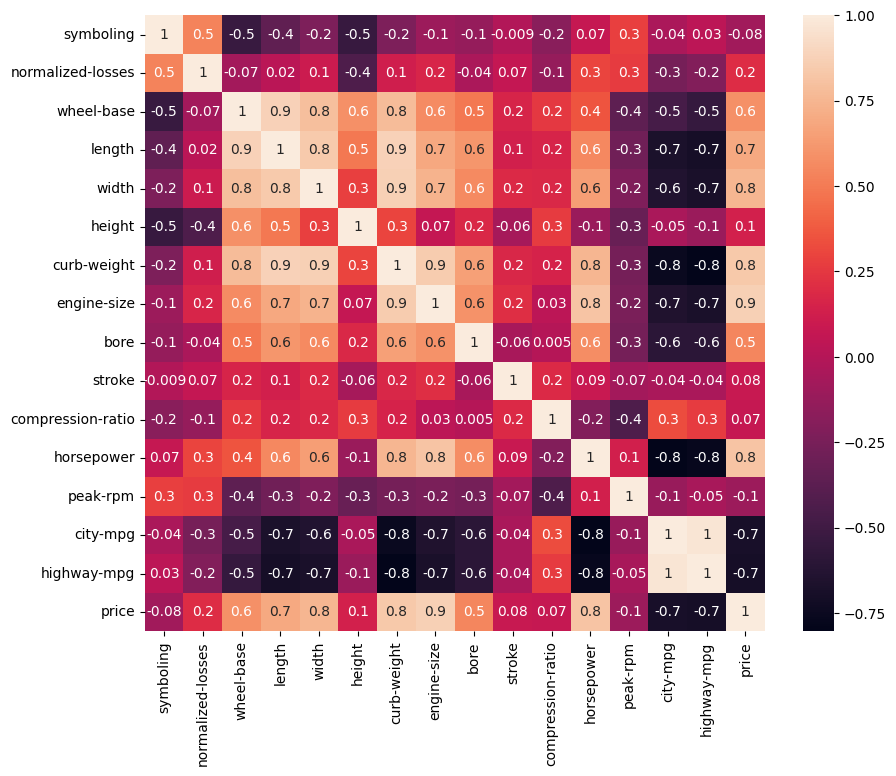

In [35]:
#Sentencia para ajustar la visualización y tamaño del gráfico
f, ax = plt.subplots(figsize=(10, 8))
#HeatMap de Seaborn, annot:muestra valores, fmt:decimales, ax:visualizacion
sns.heatmap(corrMatrix, annot = True, fmt='.1g', ax=ax)

Podemos observar que la correlación entre "price" y "engine-size" son altas, lo mismo sucede con "horsepower".

✅ Estos análisis se pudieron obtener a partir de la observación del conjunto de datos. ¡En los próximos módulos veremos mucho más! 🤗

✅ Este proyecto se llevó a cabo gracias a los conocimientos impartidos por <b>Anabel Montero</b> en el curso de <b>Preparación de datos</b> de <b>EDteam</b>, estos módulos son creación de la docente en dicho curso, siendo modificados minuciosamente.

✅ Muchas gracias por tomarte el tiempo en leer y practicar este notebook. ¡Espero que te haya sido útil! 🙌🏼 🚀